# Happy Customers Project

- EDA analysis of variables in the raw dataset

In [1]:
import pandas as pd
import numpy as np

- Importing the dataset

In [52]:
df = pd.read_csv('../data/ACME-HappinessSurvey2020.csv')

- Checking the shape of the dataframe

In [3]:
df.shape

(126, 7)

- Checking dataframe structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


- Checking the beginning of the dataframe

In [5]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


- Checking for missing values

In [6]:
df.isna()

,Y,X1,X2,X3,X4,X5,X6
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
121,False,False,False,False,False,False,False
122,False,False,False,False,False,False,False
123,False,False,False,False,False,False,False
124,False,False,False,False,False,False,False


In [7]:
null_values = df.isna().sum(axis=0)

In [8]:
null_values

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

- Checking for variables with unique values

In [9]:
for (columnName, columnData) in df.iteritems():
    print('Does the variable', columnName, 'has unique values? --------> ', columnData.is_unique)

Does the variable Y has unique values? -------->  False
Does the variable X1 has unique values? -------->  False
Does the variable X2 has unique values? -------->  False
Does the variable X3 has unique values? -------->  False
Does the variable X4 has unique values? -------->  False
Does the variable X5 has unique values? -------->  False
Does the variable X6 has unique values? -------->  False


- Since all variables are integers, there is no need to split the dataset into categorical and numerical variables
- Next step is to perform EDA for numerical variables

### Identifying skillness and distribution

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
print(df.describe())

                Y          X1          X2          X3          X4          X5  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.547619    4.333333    2.531746    3.309524    3.746032    3.650794   
std      0.499714    0.800000    1.114892    1.023440    0.875776    1.147641   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    2.000000    3.000000    3.000000    3.000000   
50%      1.000000    5.000000    3.000000    3.000000    4.000000    4.000000   
75%      1.000000    5.000000    3.000000    4.000000    4.000000    4.000000   
max      1.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               X6  
count  126.000000  
mean     4.253968  
std      0.809311  
min      1.000000  
25%      4.000000  
50%      4.000000  
75%      5.000000  
max      5.000000  


/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


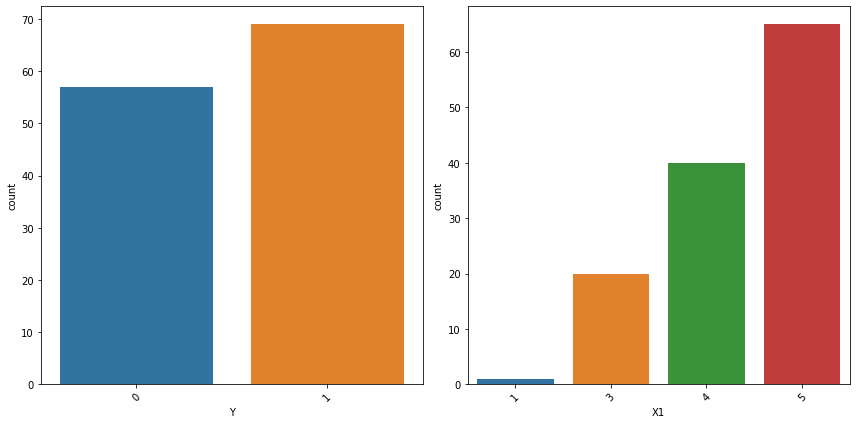

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


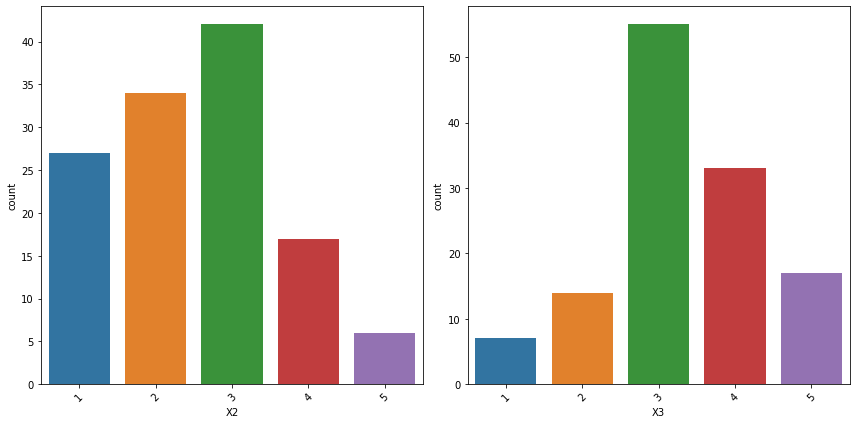

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


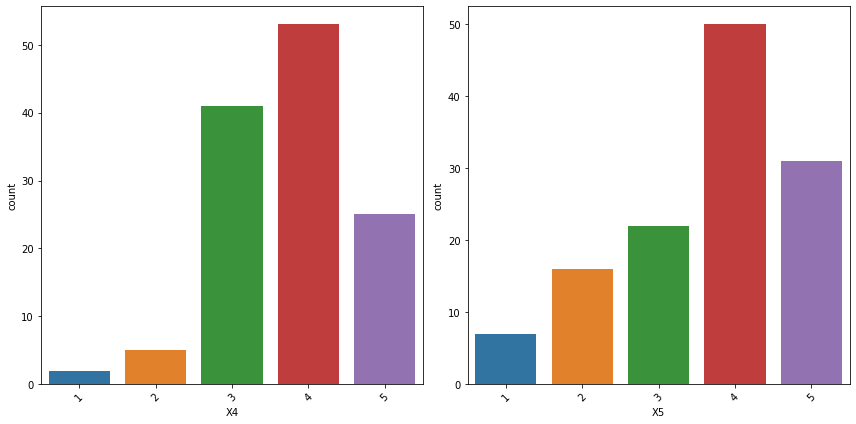

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: list index out of range

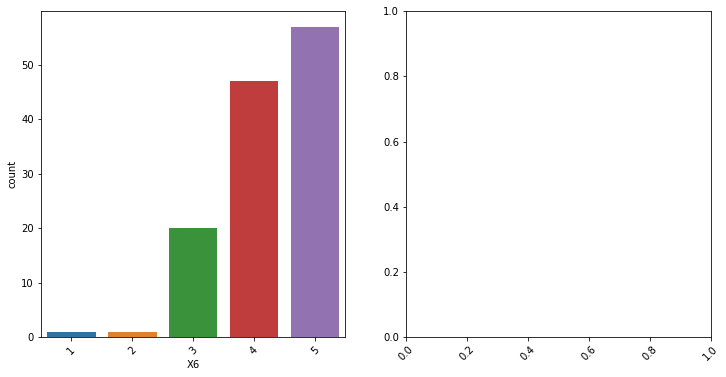

In [12]:
cols = ['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']

for i in range(0,len(cols),2):
        plt.figure(figsize=(12,6))
        plt.subplot(121)
        plt.xticks(rotation = 45)
        sns.countplot(df[cols[i]])
        plt.subplot(122)
        plt.xticks(rotation = 45)
        sns.countplot(df[cols[i+1]])
        plt.tight_layout()
        plt.show()

<AxesSubplot:>

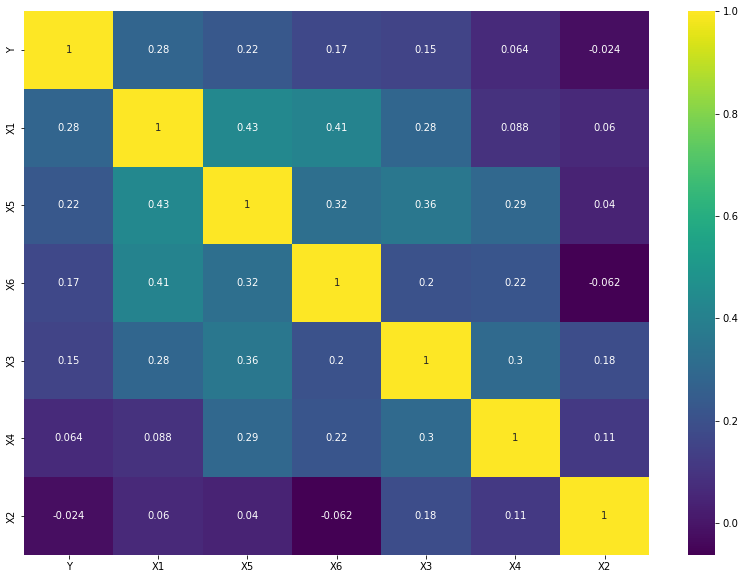

In [13]:
k = 7
cols = df.corr().nlargest(k, 'Y')['Y'].index
cm = df[cols].corr()
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

- Grouping all variables into one named 'X7'
- X7 means overall satisfaction based on the other variables
- Only clients with overall rate of 5 for all questions were considered happy (extreme scenario)

In [53]:
# Grouping to variable X15
df['X15'] = (df['X1'] + df['X5'])/2

def enconder(df) : 
    if  df['X15'] > 3 :
        return 1
    else : 
        return 0
    
    
df['X152'] = df.apply(lambda df:enconder(df), axis = 1)
df['X152']

0      0
1      1
2      1
3      1
4      1
      ..
121    1
122    1
123    1
124    1
125    1
Name: X152, Length: 126, dtype: int64

In [54]:
# Grouping to variable X16
df['X16'] = (df['X3'] + df['X5'])/2

def encoder(df) : 
    if  df['X16'] > 3 :
        return 1
    else : 
        return 0
    
    
df['X162'] = df.apply(lambda df:encoder(df), axis = 1)
df['X162']

0      0
1      1
2      0
3      0
4      0
      ..
121    1
122    0
123    1
124    1
125    1
Name: X162, Length: 126, dtype: int64

In [55]:
df

,Y,X1,X2,X3,X4,X5,X6,X15,X152,X16,X162
0,0,3,3,3,4,2,4,2.5,0,2.5,0
1,0,3,2,3,5,4,3,3.5,1,3.5,1
2,1,5,3,3,3,3,5,4.0,1,3.0,0
3,0,5,4,3,3,3,5,4.0,1,3.0,0
4,0,5,4,3,3,3,5,4.0,1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3,4.5,1,3.5,1
122,1,5,2,3,4,2,5,3.5,1,2.5,0
123,1,5,3,3,4,4,5,4.5,1,3.5,1
124,0,4,3,3,4,4,5,4.0,1,3.5,1


### Applying a logistic regression to get a glance of the current scenario

In [83]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [84]:
#Create features and label
features = df.iloc[:, [2,4,6,7,8,9,10]].values
label = df.iloc[:,0].values

In [85]:
features

array([[3. , 4. , 4. , 2.5, 0. , 2.5, 0. ],
       [2. , 5. , 3. , 3.5, 1. , 3.5, 1. ],
       [3. , 3. , 5. , 4. , 1. , 3. , 0. ],
       [4. , 3. , 5. , 4. , 1. , 3. , 0. ],
       [4. , 3. , 5. , 4. , 1. , 3. , 0. ],
       [5. , 5. , 5. , 5. , 1. , 4. , 1. ],
       [1. , 2. , 3. , 2. , 0. , 1.5, 0. ],
       [4. , 4. , 5. , 4.5, 1. , 4. , 1. ],
       [1. , 4. , 4. , 4. , 1. , 4. , 1. ],
       [4. , 2. , 5. , 4.5, 1. , 4.5, 1. ],
       [2. , 3. , 3. , 2.5, 0. , 2.5, 0. ],
       [4. , 4. , 4. , 4. , 1. , 3.5, 1. ],
       [2. , 5. , 5. , 5. , 1. , 4.5, 1. ],
       [2. , 5. , 3. , 4. , 1. , 4. , 1. ],
       [1. , 3. , 3. , 4. , 1. , 3.5, 1. ],
       [2. , 3. , 4. , 3.5, 1. , 4. , 1. ],
       [3. , 5. , 5. , 4.5, 1. , 4. , 1. ],
       [1. , 3. , 5. , 4.5, 1. , 4. , 1. ],
       [1. , 4. , 5. , 4.5, 1. , 3. , 0. ],
       [2. , 4. , 4. , 4. , 1. , 4. , 1. ],
       [2. , 3. , 4. , 4. , 1. , 3.5, 1. ],
       [3. , 5. , 4. , 4.5, 1. , 5. , 1. ],
       [3. , 5. , 4. , 4.5, 1. ,

In [86]:
label.shape

(126,)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [88]:
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)


In [89]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [90]:
#F1 Score
from sklearn.metrics import f1_score
print("Training Score is {} and Testing Score is {}".format(f1_score(y_train, model.predict(X_train)),f1_score(y_test, model.predict(X_test))))

Training Score is 0.732824427480916 and Testing Score is 0.6451612903225806


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49        42
           1       0.66      0.83      0.73        58

    accuracy                           0.65       100
   macro avg       0.64      0.62      0.61       100
weighted avg       0.65      0.65      0.63       100



In [92]:
y_pred = model.predict(X_test)

In [93]:
confusion_matrix(y_test, y_pred)

array([[ 5, 10],
       [ 1, 10]])

In [48]:
import matplotlib.cm as cm
from matplotlib import offsetbox
from sklearn import decomposition

In [29]:
features_pca = decomposition.PCA(n_components=2).fit_transform(features)
features_pca.shape

(126, 2)

In [30]:
def embedding_plot(features,labels,title):
  plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='Spectral', s=5)
  plt.gca().set_facecolor((1, 1, 1))
  plt.xlabel('1st dimension')
  plt.ylabel('2nd dimension')
  plt.colorbar(boundaries=np.arange(2)-0.5).set_ticks(np.arange(2))
  plt.grid(False)
  plt.title(title, fontsize=24);

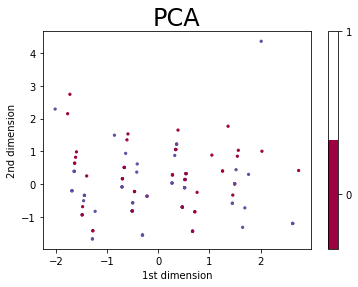

In [31]:
embedding_plot(features_pca, label,"PCA")

[0.4132233  0.27609043 0.1387808  0.11177536 0.03548451]


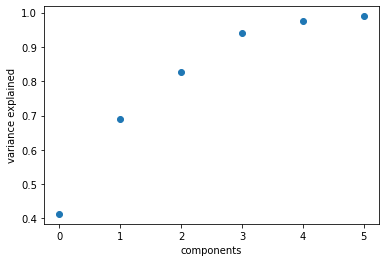

In [75]:
component_num = 7
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(features)

plt.scatter(range(0,component_num),np.cumsum(pca.explained_variance_ratio_))
plt.gca().set_facecolor((1, 1, 1))
plt.xlabel('components')
plt.ylabel('variance explained')

print(pca.explained_variance_ratio_[0:5])